/mnt/batch/tasks/shared
/mnt/batch/tasks
0 train acc, test acc |0.13233333333333333,0.1342
600 train acc, test acc |0.7879166666666667,0.7961
1200 train acc, test acc |0.8772666666666666,0.882
1800 train acc, test acc |0.8981166666666667,0.9023
2400 train acc, test acc |0.9080333333333334,0.9103
3000 train acc, test acc |0.91555,0.9165
3600 train acc, test acc |0.9209833333333334,0.9211
4200 train acc, test acc |0.92405,0.9259
4800 train acc, test acc |0.9288333333333333,0.9294
5400 train acc, test acc |0.9318,0.9304
6000 train acc, test acc |0.9343333333333333,0.9346
6600 train acc, test acc |0.9378,0.9368
7200 train acc, test acc |0.9401833333333334,0.9391
7800 train acc, test acc |0.94245,0.9406
8400 train acc, test acc |0.9441333333333334,0.9425
9000 train acc, test acc |0.9464,0.9442
9600 train acc, test acc |0.9477833333333333,0.9443


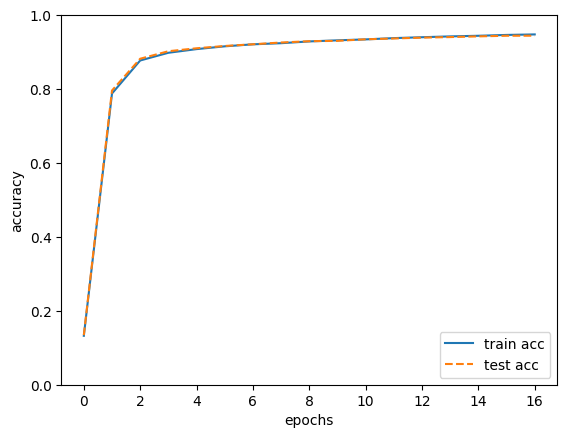

In [11]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from ch03.two_layer_net import TwoLayerNet

(x_train, t_train),(x_test, t_test) = load_mnist(normalize=True , one_hot_label=True)

network =TwoLayerNet(input_size = 784, hidden_size=50, output_size=10)

#하이퍼파라미터
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

#1에폭당 반복수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    #미니배치
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    #기울기 계산
    #grad = network.numerical_gradient(x_batch,t_batch)
    grad = network.gradient(x_batch, t_batch)

    #매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]


    #학습경과기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    #1에폭당 정확도 계산
    if i% iter_per_epoch ==0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(i, "train acc, test acc |" +str(train_acc)+","+str(test_acc))

#그래프
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label ='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0s, 1.0)
plt.legend(loc='lower right')
plt.show()


